# K-Means clustering algorithm

The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

The average complexity is given by O(k n T), were n is the number of samples and T is the number of iteration.

The worst case complexity is given by O(n^(k+2/p)) with n = n_samples, p = n_features. (D. Arthur and S. Vassilvitskii, ‘How slow is the k-means method?’ SoCG2006)

In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

### Conditions from the task
8 dots: 

| A   | B   | C   | D   | E   | F   | G   |  H  |
|-----|-----|-----|-----|-----|-----|-----|-----|
| 2,3 | 3,4 | 5,3 | 2,3 | 4,2 | 3,2 | 1,4 | 2,1 |



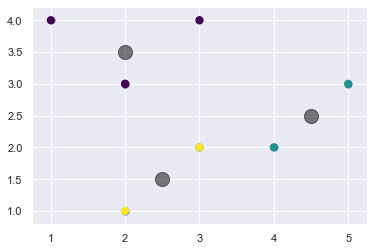

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
import sklearn.metrics as skMetrics

#Кол-во кластеров
number_of_clusters = 3

X = np.zeros((8, 2)) 

##############################
#### Точки сюда ставь ########
##############################
X[0] = 2, 3 
X[1] = 3, 4 
X[2] = 5, 3 
X[3] = 2, 3 
X[4] = 4, 2 
X[5] = 3, 2 
X[6] = 1, 4 
X[7] = 2, 1 

##############################
## Больше ничего не трогай ###
##############################

plt.scatter(X[:, 0], X[:, 1], s=50);


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


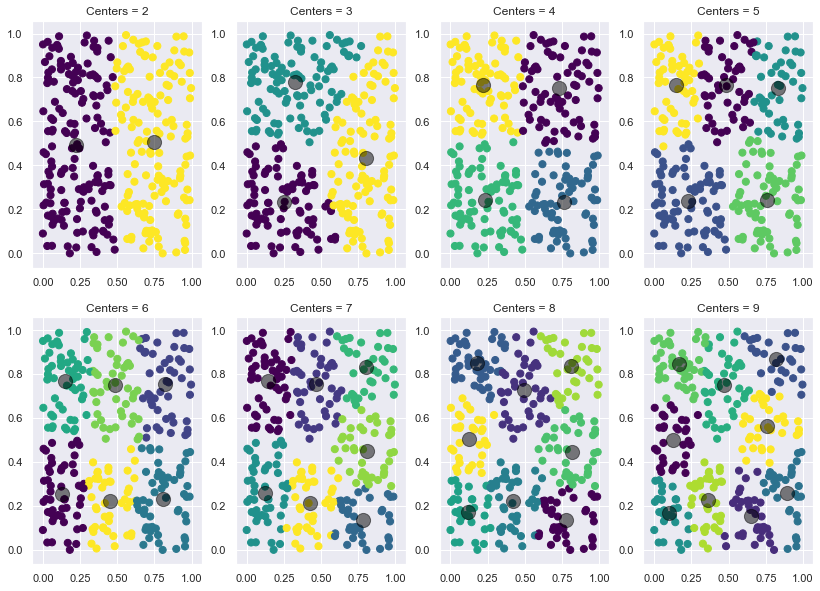

In [34]:
fig, axs = plt.subplots(2, 4,figsize=(14, 10))

d_b_indexes = []
calinski = []
silhouette = []
for ncenters, ax in enumerate(axs.reshape(-1), 2):
    kmeans = KMeans(n_clusters=ncenters)
    kmeans.fit(X)
    labels = kmeans.labels_
    y_kmeans = kmeans.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    ax.set_title('Centers = {0}'.format(ncenters))
    
    index = skMetrics.davies_bouldin_score(X, labels)
    calinski.append(skMetrics.calinski_harabasz_score(X, labels))
    silhouette.append(skMetrics.silhouette_score(X, labels, metric='euclidean'))
    d_b_indexes.append(index)

# Clustering metrics
Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.

### Davies-Bouldin Index
If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.
### Advantages
 * The computation of Davies-Bouldin is simpler than that of Silhouette scores.

 * The index is computed only quantities and features inherent to the dataset.
 
## Calinski-Harabasz Index
If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)
### Advantages
 * The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
 
 * The score is fast to compute.
 
## Silhouette Coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. 

### Advantages
 * The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

 * The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

[1.1211324144057755, 0.8771503293804276, 0.7807431195752661, 0.8554092747586116, 0.8056563320943887, 0.8084414611064281, 0.8165042853267728, 0.781178015876619]
[194.34388960705127, 237.3084192090885, 293.2042946755679, 280.7140568001228, 282.18950086175664, 286.6732579513535, 296.8174367317364, 303.25540235971795]
[0.36650000699386387, 0.3852722492945959, 0.40481349814172013, 0.38810034453202835, 0.38935993771813265, 0.38462589607848197, 0.3756182545886573, 0.38711286993445027]


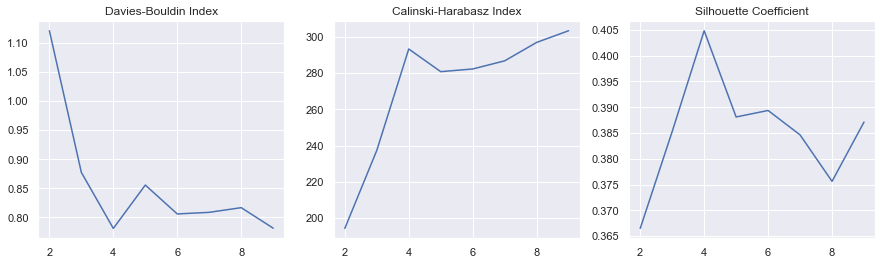

In [30]:
fig2, ax2 = plt.subplots(1, 3, figsize=(15,4))

ax2[0].set_title('Davies-Bouldin Index')
ax2[0].plot(np.r_[2:10], d_b_indexes)

ax2[1].set_title('Calinski-Harabasz Index')
ax2[1].plot(np.r_[2:10], calinski)

ax2[2].set_title('Silhouette Coefficient')
ax2[2].plot(np.r_[2:10], silhouette)

# Increasing amount of points for clustering
   Total 300 dots

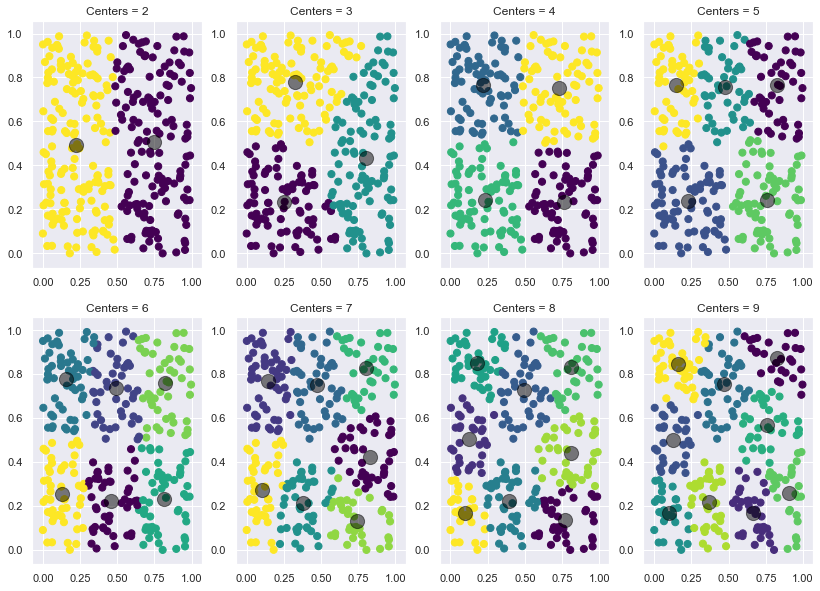

In [31]:
d_b_indexes = []
xpts = np.zeros(1)
ypts = np.zeros(1)
for i in range(30):
    xpts = np.hstack((xpts, np.random.random_sample(10)))
    ypts = np.hstack((ypts, np.random.random_sample(10)))

# Трансиормируем в массив координат
X = np.vstack((xpts,ypts))
X = X.reshape(len(xpts), 2)

fig, axs = plt.subplots(2,4,figsize=(14, 10))

d_b_indexes = []
calinski = []
silhouette = []
for ncenters, ax in enumerate(axs.reshape(-1), 2):
    kmeans = KMeans(n_clusters=ncenters)
    kmeans.fit(X)
    labels = kmeans.labels_
    y_kmeans = kmeans.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    ax.set_title('Centers = {0}'.format(ncenters))
    
    index = skMetrics.davies_bouldin_score(X, labels)
    calinski.append(skMetrics.calinski_harabasz_score(X, labels))
    silhouette.append(skMetrics.silhouette_score(X, labels, metric='euclidean'))
    d_b_indexes.append(index)


[1.1572071298808995, 0.8252592951118558, 0.7098126628548032, 0.8308802982813628, 0.9229273944478553, 0.9300005475328021, 0.8284762137801052, 0.8336932168245128]
[191.3882092059824, 252.96370347463656, 348.4608966529324, 313.95575327954765, 306.83667896304416, 308.46462381733534, 320.88420977031495, 321.07973991455225]
[0.3678553999978888, 0.4028023089205601, 0.44488875337054484, 0.4033860326101669, 0.3618164686835863, 0.362221952332273, 0.37921146145314755, 0.3796186721132017]


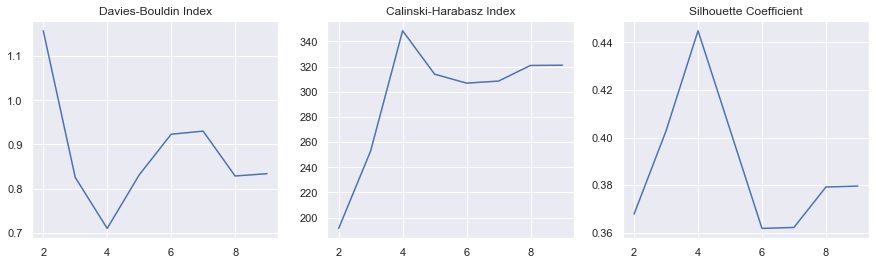

In [32]:
fig2, ax2 = plt.subplots(1, 3, figsize=(15,4))

print(d_b_indexes)
print(calinski)
print(silhouette)
ax2[0].set_title('Davies-Bouldin Index')
ax2[0].plot(np.r_[2:10], d_b_indexes)

ax2[1].set_title('Calinski-Harabasz Index')
ax2[1].plot(np.r_[2:10], calinski)

ax2[2].set_title('Silhouette Coefficient')
ax2[2].plot(np.r_[2:10], silhouette)
